In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import pandas as pd

data = []
for file in os.listdir('./new-experiments/runs'):
    with open(f'./new-experiments/runs/{file}', 'r+') as f:
        data_p = json.load(f)
        data_p['goal'] = "-".join(file.split('-')[-2:])
        data_p['NN architecture'] = '3-layer'
        data_p['data_set'] = data_p['data_set'].split('-')[1]
        if data_p['fp'] + data_p['tn'] <=40:
            continue
        print(data_p)
        data.append(data_p)

for file in os.listdir('./new-experiments/runs_2'):
    with open(f'./new-experiments/runs_2/{file}', 'r+') as f:
        data_p = json.load(f)
        data_p['goal'] = "-".join(file.split('-')[-2:])
        data_p['NN architecture'] = '2-layer'
        data_p['data_set'] = data_p['data_set'].split('-')[1]
        if data_p['fp'] + data_p['tn'] <=40:
            continue
        #total_normal = data_p['fp'] + data_p['tn']
        #total_training = 0.2
        #data_p['fp'] = int(0.2 * data_p['fp'])
        #data_p['tn'] = int(0.2 * data_p['tn'])
        print(data_p)
        data.append(data_p)
        
print(len(data))
#data = list(filter(lambda x: x['input_size'] != 10, data))
soft_boundary = list(filter(lambda x: x['goal'] == 'soft-boundary', data))
one_class = list(filter(lambda x: x['goal'] == 'one-class', data))

{'tp': 91, 'fp': 6, 'fn': 256, 'tn': 58, 'acc': 0.36253041362530414, 'f_one': 0.4099099099099099, 'mcc': 0.31869349916254064, 'data_set': '10', 'latent_space_size': 2, 'goal': 'one-class', 'epoch_ae': 500, 'epoch_dsvdd': 1000, 'input_size': 20, 'NN architecture': '3-layer'}
{'tp': 519, 'fp': 3, 'fn': 873, 'tn': 136, 'acc': 0.4278249510124102, 'f_one': 0.542319749216301, 'mcc': 0.5736085971507576, 'data_set': '20', 'latent_space_size': 2, 'goal': 'one-class', 'epoch_ae': 500, 'epoch_dsvdd': 1000, 'input_size': 20, 'NN architecture': '3-layer'}
{'tp': 571, 'fp': 9, 'fn': 821, 'tn': 125, 'acc': 0.45609436435124506, 'f_one': 0.579107505070994, 'mcc': 0.5314305892743776, 'data_set': '20', 'latent_space_size': 2, 'goal': 'soft-boundary', 'epoch_ae': 500, 'epoch_dsvdd': 1000, 'input_size': 20, 'NN architecture': '3-layer'}
{'tp': 858, 'fp': 4, 'fn': 674, 'tn': 118, 'acc': 0.5900846432889963, 'f_one': 0.7167919799498746, 'mcc': 0.7029184919206283, 'data_set': '30', 'latent_space_size': 2, 'goa

In [46]:
print(max(soft_boundary, key=lambda x: x['mcc']))
print(max(one_class, key=lambda x: x['mcc']))
one_class.sort(key=lambda x: x['mcc'], reverse=True)
#print(one_class[:10])
soft_boundary.sort(key=lambda x: x['mcc'], reverse=True)
print(soft_boundary[:10])
soft_boundary = pd.DataFrame(soft_boundary)
one_class = pd.DataFrame(one_class)

soft_boundary = soft_boundary.rename(columns={"fp": "false positive", "fn": "false negative", "mcc": "MCC", "latent_space_size": "Latent Space Size", "data_set": "Window Size", "input_size": "Input Size"})
one_class = one_class.rename(columns={"fp": "false positive", "fn": "false negative", "mcc": "MCC", "latent_space_size": "Latent Space Size", "data_set": "Window Size", "input_size": "Input Size"})

{'tp': 1148, 'fp': 1, 'fn': 628, 'tn': 48, 'acc': 0.6553424657534247, 'f_one': 0.7849572649572649, 'mcc': 0.7782652441509055, 'data_set': '50', 'latent_space_size': 7, 'goal': 'soft-boundary', 'epoch_ae': 500, 'epoch_dsvdd': 1000, 'input_size': 50, 'NN architecture': '3-layer'}
{'tp': 1299, 'fp': 1, 'fn': 477, 'tn': 55, 'acc': 0.7390829694323144, 'f_one': 0.8446033810143043, 'mcc': 0.8340294428779205, 'data_set': '50', 'latent_space_size': 5, 'goal': 'one-class', 'epoch_ae': 500, 'epoch_dsvdd': 1000, 'input_size': 40, 'NN architecture': '3-layer'}
[{'tp': 1148, 'fp': 1, 'fn': 628, 'tn': 48, 'acc': 0.6553424657534247, 'f_one': 0.7849572649572649, 'mcc': 0.7782652441509055, 'data_set': '50', 'latent_space_size': 7, 'goal': 'soft-boundary', 'epoch_ae': 500, 'epoch_dsvdd': 1000, 'input_size': 50, 'NN architecture': '3-layer'}, {'tp': 1074, 'fp': 0, 'fn': 702, 'tn': 50, 'acc': 0.615553121577218, 'f_one': 0.7536842105263157, 'mcc': 0.7776437035877868, 'data_set': '50', 'latent_space_size': 2

<Axes: xlabel='Input Size', ylabel='MCC'>

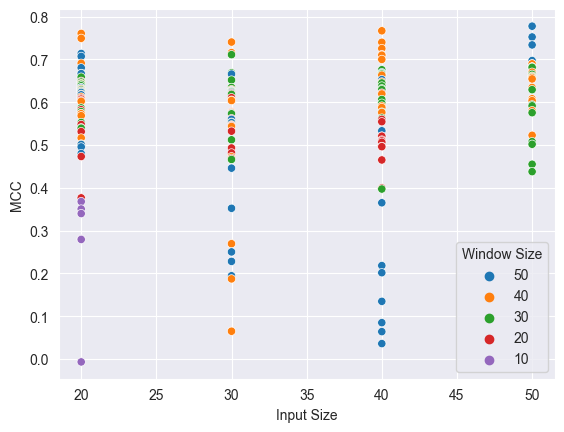

In [47]:
sns.scatterplot(x='Input Size', y='MCC', hue='Window Size', data=soft_boundary)

<Axes: xlabel='Input Size', ylabel='MCC'>

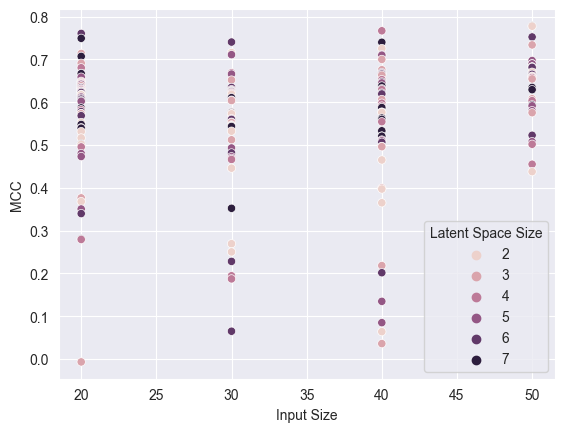

In [48]:
sns.scatterplot(x='Input Size', y='MCC', hue='Latent Space Size', data=soft_boundary)

<Axes: xlabel='Input Size', ylabel='Latent Space Size'>

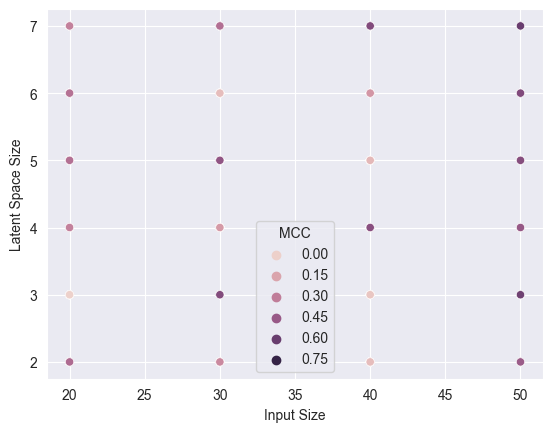

In [49]:
sns.scatterplot(x='Input Size', y='Latent Space Size', hue='MCC', data=soft_boundary)

<Axes: xlabel='Latent Space Size', ylabel='MCC'>

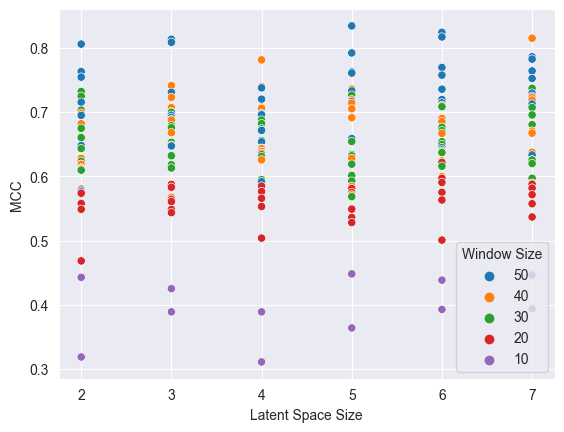

In [50]:
sns.scatterplot(x='Latent Space Size', y='MCC', hue='Window Size', data=one_class)

<Axes: xlabel='Input Size', ylabel='MCC'>

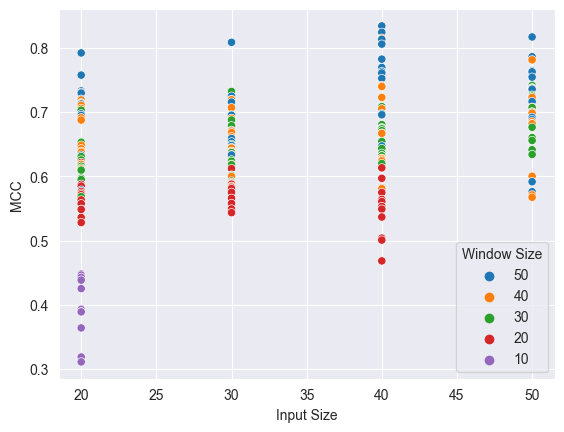

In [51]:
sns.scatterplot(x='Input Size', y='MCC', hue='Window Size', data=one_class)

<Axes: xlabel='Input Size', ylabel='MCC'>

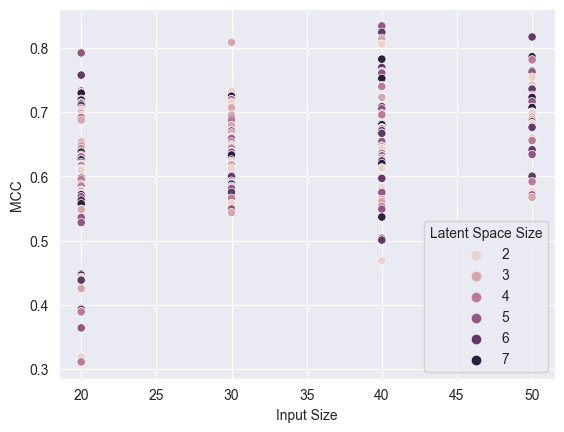

In [52]:
sns.scatterplot(x='Input Size', y='MCC', hue='Latent Space Size', data=one_class)

<Axes: xlabel='Input Size', ylabel='MCC'>

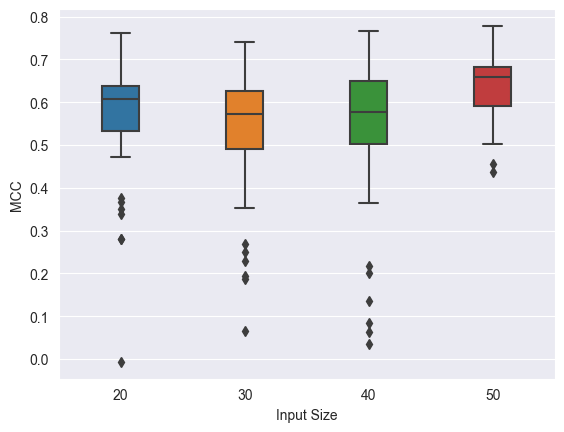

In [53]:
sns.boxplot(x='Input Size', y='MCC', data=soft_boundary, width=0.3)

<Axes: xlabel='Latent Space Size', ylabel='MCC'>

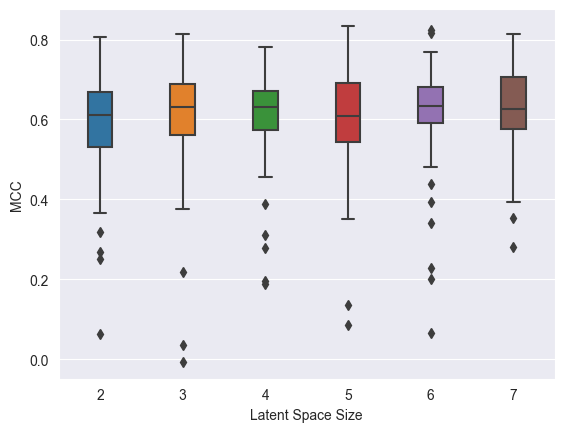

In [54]:
sns.boxplot(x='Latent Space Size', y='MCC', data=pd.concat([one_class, soft_boundary]), width=0.3)

<Axes: xlabel='Latent Space Size', ylabel='MCC'>

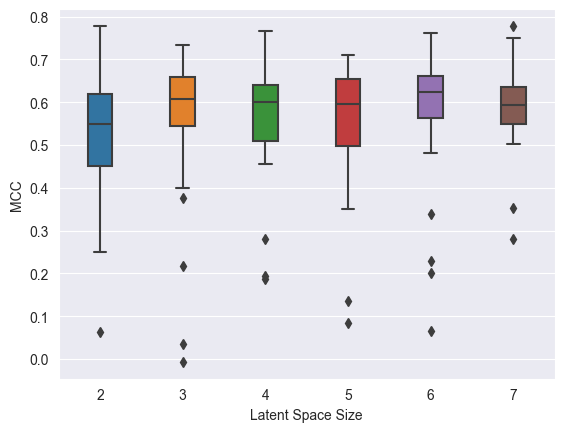

In [55]:
sns.boxplot(x='Latent Space Size', y='MCC', data=soft_boundary, width=0.3)

<Axes: xlabel='Input Size', ylabel='false negative'>

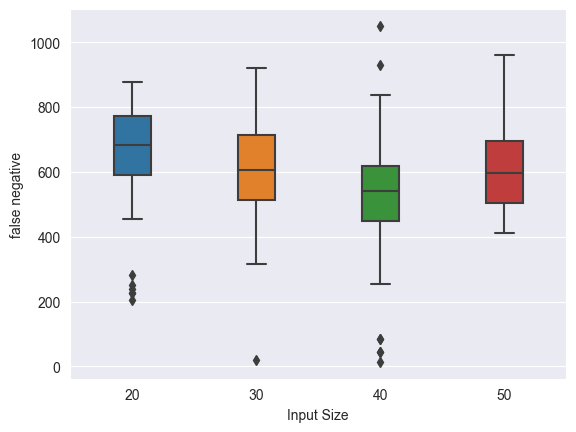

In [56]:
sns.boxplot(x='Input Size', y='false negative', data=soft_boundary, width=0.3)

<Axes: xlabel='Input Size', ylabel='false negative'>

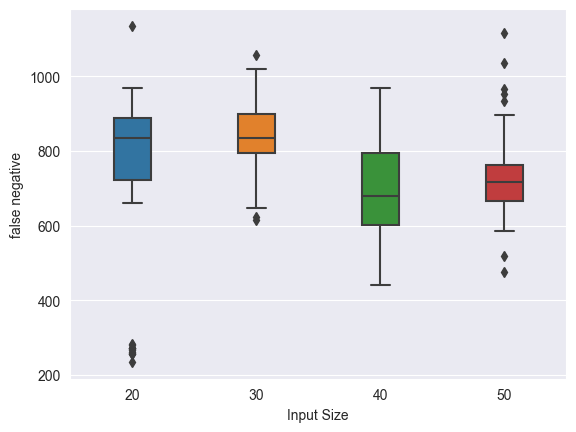

In [57]:
sns.boxplot(x='Input Size', y='false negative', data=one_class, width=0.3)

<Axes: xlabel='Input Size', ylabel='false positive'>

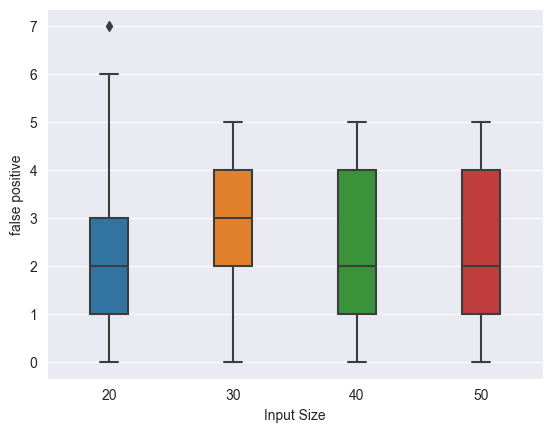

In [58]:
sns.boxplot(x='Input Size', y='false positive', data=one_class, width=0.3)

<Axes: xlabel='Input Size', ylabel='false positive'>

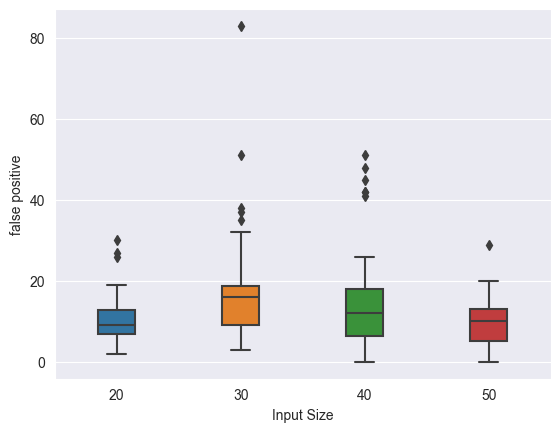

In [59]:
sns.boxplot(x='Input Size', y='false positive', data=soft_boundary, width=0.3)

(4.5, -0.5)

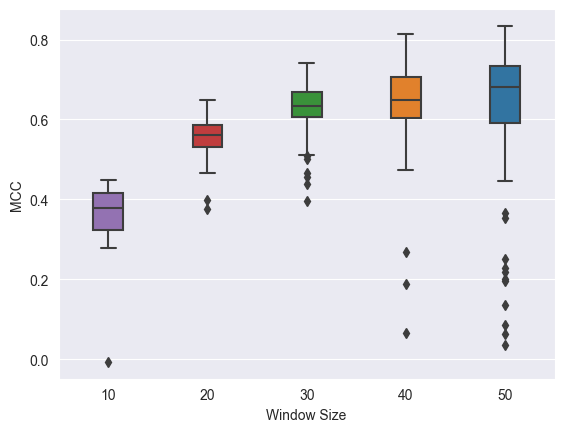

In [68]:

sns.boxplot(y='MCC', x='Window Size', data=pd.concat([soft_boundary, one_class]), width=0.3)
plt.xlim(reversed(plt.xlim()))

<Axes: xlabel='MCC', ylabel='Window Size'>

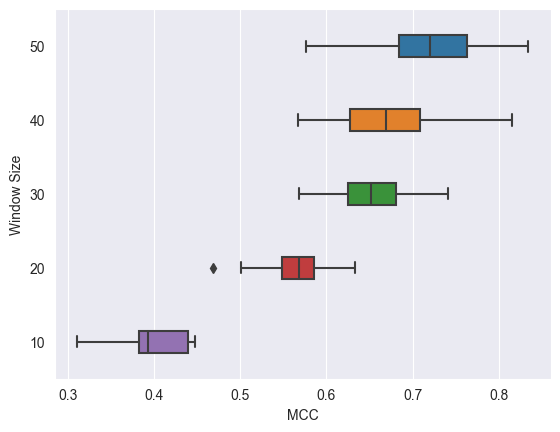

In [61]:
sns.boxplot(y='Window Size', x='MCC', data=one_class, width=0.3)

<Axes: xlabel='MCC', ylabel='NN architecture'>

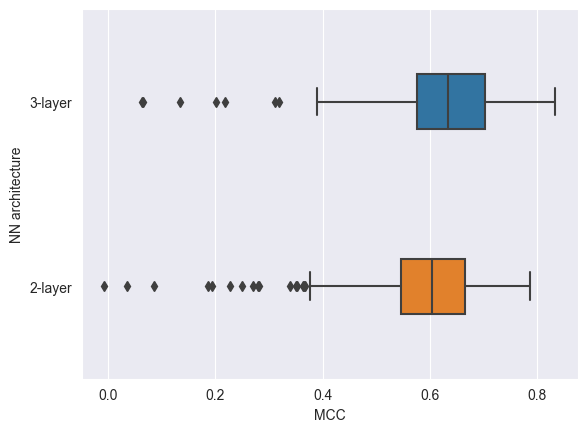

In [62]:
sns.boxplot(y='NN architecture', x='MCC', data=pd.concat([soft_boundary, one_class]), width=0.3)

<Axes: xlabel='MCC', ylabel='goal'>

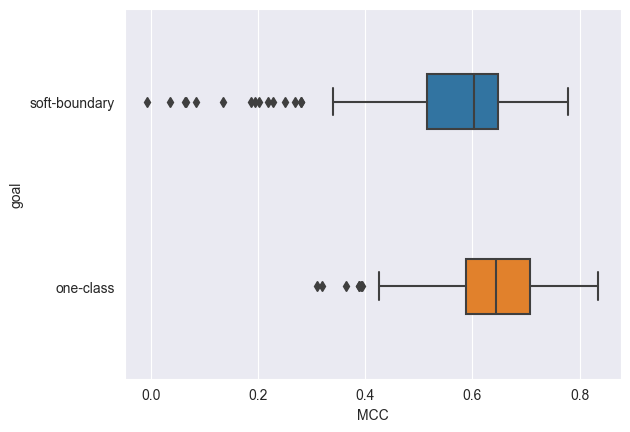

In [63]:
sns.boxplot(y='goal', x='MCC', data=pd.concat([soft_boundary, one_class]), width=0.3)

In [64]:
false_negative_rate = 0.0

for d in one_class.values:
    false_negative_rate += d[2] / (d[0] + d[2])

for d in soft_boundary.values:
    false_negative_rate += d[2] / (d[0] + d[2])
    
print(false_negative_rate / (len(one_class.values) + len(soft_boundary.values)))

0.46645730231853305
